In [2]:
import pandas as pd

In [6]:
alldata = pd.read_csv('./sm.data.1.AllData', delimiter='\t',index_col=False)
alldata.head()

/home/esfp/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,series_id,year,period,value,footnote_codes
0,SMS01000000000000001,1990,M01,1623.1,
1,SMS01000000000000001,1990,M02,1621.3,
2,SMS01000000000000001,1990,M03,1620.6,
3,SMS01000000000000001,1990,M04,1634,
4,SMS01000000000000001,1990,M05,1639.8,


###### check column names

In [11]:
alldata.columns

Index(['series_id', 'year', 'period', 'value', 'footnote_codes'], dtype='object')

###### filter columns

In [13]:
alldata=alldata[['series_id','year','period','value']]
alldata.head()

,series_id,year,period,value
0,SMS01000000000000001,1990,M01,1623.1
1,SMS01000000000000001,1990,M02,1621.3
2,SMS01000000000000001,1990,M03,1620.6
3,SMS01000000000000001,1990,M04,1634
4,SMS01000000000000001,1990,M05,1639.8


###### filter on years

In [14]:
a=alldata[(alldata.year > 1993) & (alldata.year < 2016)]
a.head()

,series_id,year,period,value
48,SMS01000000000000001,1994,M01,1730.7
49,SMS01000000000000001,1994,M02,1733.3
50,SMS01000000000000001,1994,M03,1739.8
51,SMS01000000000000001,1994,M04,1742.9
52,SMS01000000000000001,1994,M05,1746.4


##### Add quarter to data

In [16]:
a.loc[:,'q'] = 0;
a.loc[a.period < 'M04', 'q']=1
a.loc[(a.period > 'M03') & (a.period < 'M07'), 'q']=2
a.loc[(a.period > 'M06') & (a.period < 'M10'), 'q']=3
a.loc[a.period > 'M09', 'q']=4
a.head()

/home/esfp/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,series_id,year,period,value,q
48,SMS01000000000000001,1994,M01,1730.7,1
49,SMS01000000000000001,1994,M02,1733.3,1
50,SMS01000000000000001,1994,M03,1739.8,1
51,SMS01000000000000001,1994,M04,1742.9,2
52,SMS01000000000000001,1994,M05,1746.4,2


In [22]:
a.dtypes


series_id    object
year          int64
period       object
value        object
q             int64
dtype: object

###### value type is object which needs to be changed to numeric form for groupby 

In [23]:
a['value'] = a['value'].astype(float)

/home/esfp/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
a.dtypes

series_id     object
year           int64
period        object
value        float64
q              int64
dtype: object

In [34]:
b=a.groupby(['series_id','year','q'])['value'].mean().reset_index()   # .reset_index() keep it as dataframe
b.head()

,series_id,year,q,value
0,SMS01000000000000001,1994,1,1734.600000
1,SMS01000000000000001,1994,2,1749.033333
2,SMS01000000000000001,1994,3,1766.500000
3,SMS01000000000000001,1994,4,1783.433333
4,SMS01000000000000001,1995,1,1791.600000


In [35]:
b.columns

Index(['series_id', 'year', 'q', 'value'], dtype='object')

In [37]:
# b['year']

In [38]:
type(b)

pandas.core.frame.DataFrame

In [91]:
# for idx,row in c.iterrows():
#     print(row["series_id"])

# c.apply(lambda x: x['series_id'][0:10])
c=b
c['state_code']=c['series_id'].str[3:5] #.str.split(',', return_type='frame')
c['MSA_id']=c['series_id'].str[5:10] #.str.split(',', return_type='frame')
# c['st_MSA_id']=c['series_id'].str[3:10] #.str.split(',', return_type='frame')
c['st_id']=c['series_id'].str[3:5] #.str.split(',', return_type='frame')
c['data_type_code']=c['series_id'].str[18:20] #.str.split(',', return_type='frame')
c['industry_code']=c['series_id'].str[10:18] #.str.split(',', return_type='frame')
# c=c[c > '00010']
# len(c)
c.head()
# type(c)
    

,series_id,year,q,value,state_code,MSA_id,st_id,data_type_code,industry_code
0,SMS01000000000000001,1994,1,1734.600000,01,00000,01,01,00000000
1,SMS01000000000000001,1994,2,1749.033333,01,00000,01,01,00000000
2,SMS01000000000000001,1994,3,1766.500000,01,00000,01,01,00000000
3,SMS01000000000000001,1994,4,1783.433333,01,00000,01,01,00000000
4,SMS01000000000000001,1995,1,1791.600000,01,00000,01,01,00000000


### get rid of state wide codes which I don't have any match in the lookup table 

In [97]:
d=c[c.MSA_id != '00000']

###### Get rid of differences which are end with 26 in series_id

In [98]:
d=d[d.data_type_code != '26']

###### keep only the 'Total Nonfarm'

In [100]:
d=d[d.industry_code == '00000000']

In [94]:
d.columns

Index(['series_id', 'year', 'q', 'value', 'state_code', 'MSA_id', 'st_id',
       'data_type_code'],
      dtype='object')

In [115]:
d=d.set_index(['MSA_id','year','q'],drop=False).sort_index()            #Brandon 1:05    loc
d.head()



series_id  year  q      value state_code  \
MSA_id year q                                                                  
10180  1994 1  SMS48101800000000001            1994  1  56.833333         48   
            1  SMU48101800000000001            1994  1  56.733333         48   
            2  SMS48101800000000001            1994  2  57.100000         48   
            2  SMU48101800000000001            1994  2  57.033333         48   
            3  SMS48101800000000001            1994  3  57.700000         48   

              MSA_id st_id data_type_code industry_code  
MSA_id year q                                            
10180  1994 1  10180    48             01      00000000  
            1  10180    48             01      00000000  
            2  10180    48             01      00000000  
            2  10180    48             01      00000000  
            3  10180    48             01      00000000

In [116]:
# e=d.groupby(['st_MSA_id','year','q'])['value'].sum().reset_index()   #keep the dataframe
e=d.groupby(['MSA_id','year','q'])['value'].mean() #main
e.head()

MSA_id  year  q
10180   1994  1    56.783333
              2    57.066667
              3    57.450000
              4    58.537500
        1995  1    59.150000
Name: value, dtype: float64

In [103]:
len(e)

38960

In [114]:
e.loc['10180'].head()


year  q
1994  1    56.783333
      2    57.066667
      3    57.450000
      4    58.537500
1995  1    59.150000
Name: value, dtype: float64

In [122]:
f=e.to_frame()
f.head()

value
MSA_id year q           
10180  1994 1  56.783333
            2  57.066667
            3  57.450000
            4  58.537500
       1995 1  59.150000

### Iterate through all the elements and update the MSA_id with Air_MSA_id

In [123]:
a = 0
for idx,row in f.iterrows():
    a+=1
    if(a==3):
        break
    print(idx)
    print(row)

('10180', 1994, 1)
value    56.783333
Name: (10180, 1994, 1), dtype: float64
('10180', 1994, 2)
value    57.066667
Name: (10180, 1994, 2), dtype: float64


In [137]:
f.to_csv('./all_grouped_MSA_year_quarter.csv',sep=',')

AttributeError: '_io.TextIOWrapper' object has no attribute 'to_csv'

###### Only for testing how to iterate through a file

In [140]:
f=open('/home/esfp/~courses/848/project/data/bls.gov/all_grouped_MSA_year_quarter.csv','r')
a=0
for line in f:
    parts = line.split(',')
    
    a+=1
    if(a==3):
        break

parts

['10180', '1994', '3', '57.86666666666667\n']

In [142]:
e.loc['10180'].head() 

year  q
1994  1    56.783333
      2    57.066667
      3    57.450000
      4    58.537500
1995  1    59.150000
Name: value, dtype: float64

###### Plot a specific MSA

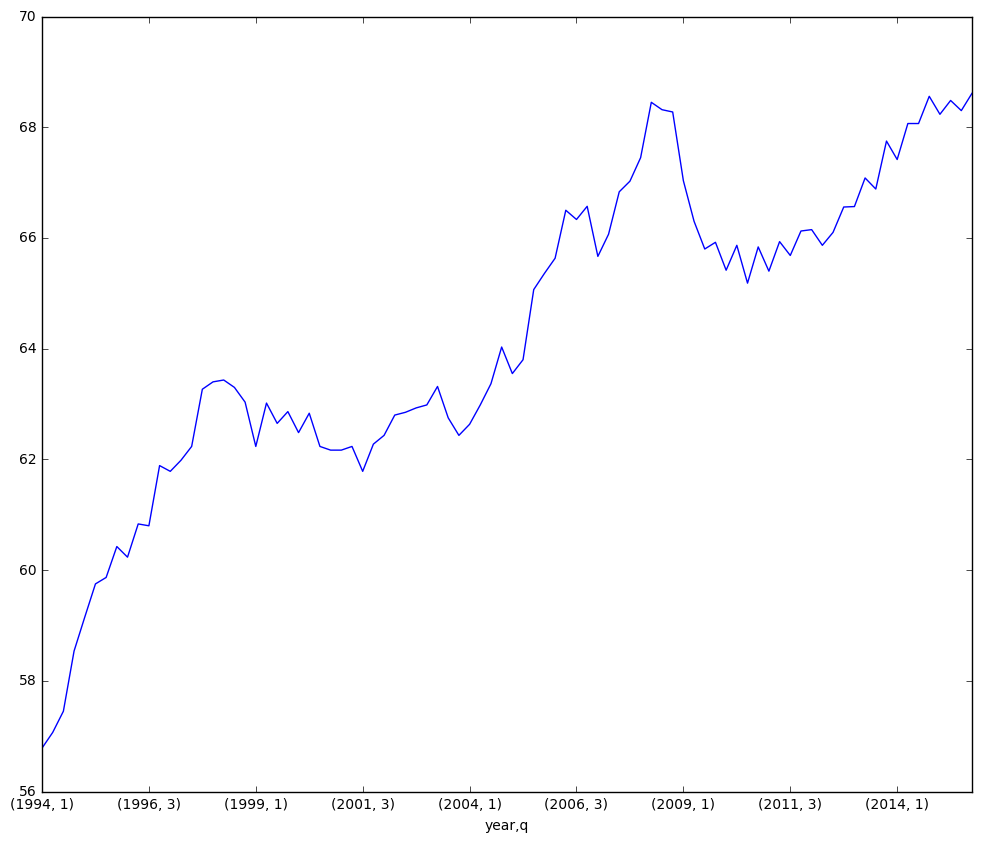

In [135]:
%matplotlib inline
g=e.loc['10180'] 

g
g.plot(figsize=(12, 10))

## start reading the look up table for metropolitan areas

In [128]:
lk = pd.read_csv('/home/esfp/~courses/848/project/data/bls.gov/merged_lookup.csv', delimiter=',')
lk.head()

,MSA_econ,state_econ,state_id_econ,MSA_air,state_air,stateid_air
0,Abilene,TX,10180,Abilene,TX,30136
1,Aguadilla-Isabela,PR,10380,Aguadilla,PR,30732
2,Albany,GA,10500,Albany,GA,30146
3,Albany-Schenectady-Troy,NY,10580,Albany,NY,30257
4,Albuquerque,NM,10740,Albuquerque,NM,30140


In [129]:
lookup={}
f=open('/home/esfp/~courses/848/project/data/bls.gov/merged_lookup.csv','r')
for line in f:
       parts = line.split(',')
       lookup[parts[2]]=parts[5][0:5]
# lookup

In [130]:
lookup['10180']

'30136'

In [131]:
f_in=open('./all_grouped_MSA_year_quarter.csv','r')
f_out=open('./all_grouped_MSA_year_quarter_with_lookup.csv','w')
# a=0
for line in f_in:
    parts = line.split(',')
    if( parts[0] in lookup):        # skip metropolitan areas which are not exist in lookup table
        f_out.write('%s,%s,%s,%s,%s\n'%(parts[0],parts[1],parts[2],parts[3].split('\n')[0],lookup[parts[0]]))

#     a+=1                  #for test purpose
#     if(a==3):
#         break
f_in.close()
f_out.close()
    

## Read the whole data

In [266]:
import pandas as pd

In [143]:
df = pd.read_csv('/home/esfp/~courses/848/project/data/bls.gov/all_grouped_MSA_year_quarter_with_lookup.csv', delimiter=',')
df.head()

,MSA_id_economy,year,quarter,mean_value,MSA_id_airline
0,10180,1994,1,56.966667,30136
1,10180,1994,2,57.200000,30136
2,10180,1994,3,57.866667,30136
3,10180,1994,4,58.666667,30136
4,10180,1995,1,59.466667,30136


#### set new index based on airline 

In [145]:
a=df.set_index(['MSA_id_airline','year','quarter'],drop=False).sort_index()            #Brandon 1:05    loc
a[a.MSA_id_airline == 30136].head()

MSA_id_economy  year  quarter  mean_value  \
MSA_id_airline year quarter                                              
30136          1994 1                 10180  1994        1   56.966667   
                    2                 10180  1994        2   57.200000   
                    3                 10180  1994        3   57.866667   
                    4                 10180  1994        4   58.666667   
               1995 1                 10180  1995        1   59.466667   

                             MSA_id_airline  
MSA_id_airline year quarter                  
30136          1994 1                 30136  
                    2                 30136  
                    3                 30136  
                    4                 30136  
               1995 1                 30136

### plot an area

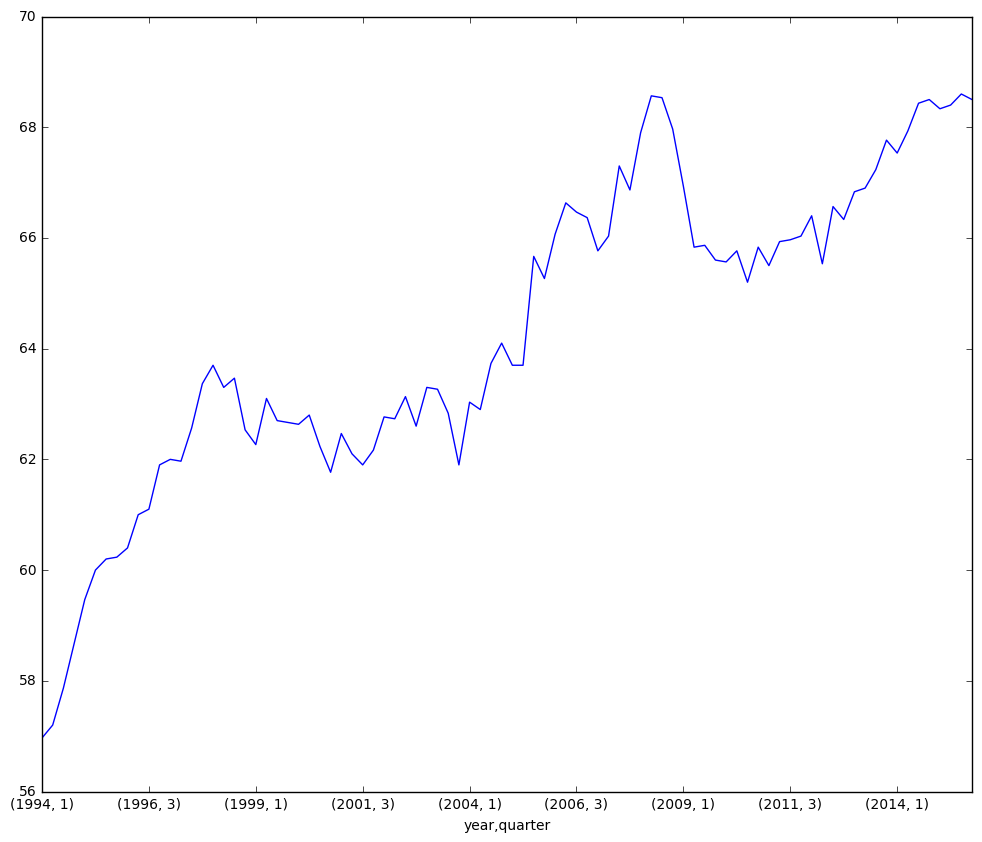

In [146]:
%matplotlib inline
b=a.loc[30136] 
b['mean_value'].plot(figsize=(12, 10))